<a href="https://colab.research.google.com/github/jsebastianquiroga/analitica_ia_puj/blob/main/Tesis/notebook_listado_estudiantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import statistics
import warnings
import re
# from sklearn.preprocessing import StandardScaler
from IPython.display import display
warnings.filterwarnings('ignore')
# from pandas_profiling import ProfileReport

#2. Exploración de datos.

In [ ]:
# Cargar tus datos en un DataFrame
df = pd.read_csv("/content/Listado Estudiantes.csv", delimiter=';', encoding='latin_1')


##2.2 Descripción de datos

In [ ]:
def describe_data(df):
    # Inicializar DataFrame vacío
    description_df = pd.DataFrame()

    # Agregar columnas una por una al DataFrame
    description_df['Nombre de cada campo o columna'] = df.columns
    description_df['Descripción'] = [''] * len(df.columns)  # Inicializar con cadenas vacías
    description_df['Tipo de dato'] = [str(dtype) for dtype in df.dtypes]
    description_df['Cantidad de registros no vacíos'] = df.notna().sum().values
    description_df['Cantidad de registros vacíos'] = df.isna().sum().values

    return description_df

# Llamar a la función
data_description_df = describe_data(df)

# Luego, puedes agregar las descripciones manualmente como en el paso 5 de la explicación anterior.

data_description_df


,Nombre de cada campo o columna,Descripción,Tipo de dato,Cantidad de registros no vacíos,Cantidad de registros vacíos
0,Año Semestre,,object,399461,0
1,Cuatrimestre población,,object,399461,0
2,Código Estudiante Banner,,object,399461,0
3,Fecha Nacimiento,,object,399328,133
4,Sede,,object,399461,0
5,Código Sede,,object,399461,0
6,Rectoría/Vicerrectoría,,object,399461,0
7,Nivel Académico,,object,399461,0
8,Nivel Formación,,object,399461,0
9,Programa,,object,399461,0


In [ ]:
def describe_data(df):
    # Inicializar DataFrame vacío
    description_df = pd.DataFrame()

    # Agregar columnas una por una al DataFrame
    description_df['Nombre variable'] = df.columns
    description_df['Descripción'] = [''] * len(df.columns)  # Inicializar con cadenas vacías
    description_df['Tipo'] = [str(dtype) for dtype in df.dtypes]
    description_df['# de registros'] = df.notna().sum().values
    description_df['# de registros vacíos'] = df.isna().sum().values
    description_df['# de valores únicos'] = df.nunique().values

    # Inicializar columnas de rango y moda/mediana con valores vacíos
    description_df['Rango'] = [''] * len(df.columns)
    description_df['Moda/Mediana'] = [''] * len(df.columns)

    for idx, column in enumerate(df.columns):
        # Si la columna es numérica, calcular el rango
        if pd.api.types.is_numeric_dtype(df[column]):
            description_df.loc[idx, 'Rango'] = f'{df[column].min()} - {df[column].max()}'
            description_df.loc[idx, 'Moda/Mediana'] = df[column].median()
        # Si la columna no es numérica, calcular la moda
        else:
            description_df.loc[idx, 'Moda/Mediana'] = df[column].mode().iloc[0] if not df[column].mode().empty else ''

    return description_df

# Llamar a la función
data_description_df = describe_data(df)

# Luego, puedes agregar las descripciones manualmente como en el paso 5 de la explicación anterior.
data_description_df

,Nombre variable,Descripción,Tipo,# de registros,# de registros vacíos,# de valores únicos,Rango,Moda/Mediana
0,Año Semestre,,object,399461,0,30,,2016-01
1,Cuatrimestre población,,object,399461,0,6,,Semestre 1
2,Código Estudiante Banner,,object,399461,0,380993,,262861
3,Fecha Nacimiento,,object,399328,133,15982,,14/09/93
4,Sede,,object,399461,0,80,,COA ENGATIVA PRES
5,Código Sede,,object,399461,0,80,,UMD
6,Rectoría/Vicerrectoría,,object,399461,0,10,,Rectoría UNIMINUTO Bogotá
7,Nivel Académico,,object,399461,0,1,,Pregrado
8,Nivel Formación,,object,399461,0,4,,Pregrado
9,Programa,,object,399461,0,99,,Administración de Empresas


## 2.3 Exploracion de datos.

In [ ]:
df.columns

Index(['Año Semestre', 'Cuatrimestre población', 'Código Estudiante Banner',
       'Fecha Nacimiento', 'Sede', 'Código Sede', 'Rectoría/Vicerrectoría',
       'Nivel Académico', 'Nivel Formación', 'Programa', 'Jornada',
       'Código Programa', 'Snies', 'Descripción Metodología',
       'Area Conocimiento', 'Código Periodo Académico Cohorte ',
       'Código Periodo Académico', 'Tipo Estudiante', 'Edad', 'Género',
       'Estado Civil', 'Estrato Social', 'Lugar Residencia'],
      dtype='object')

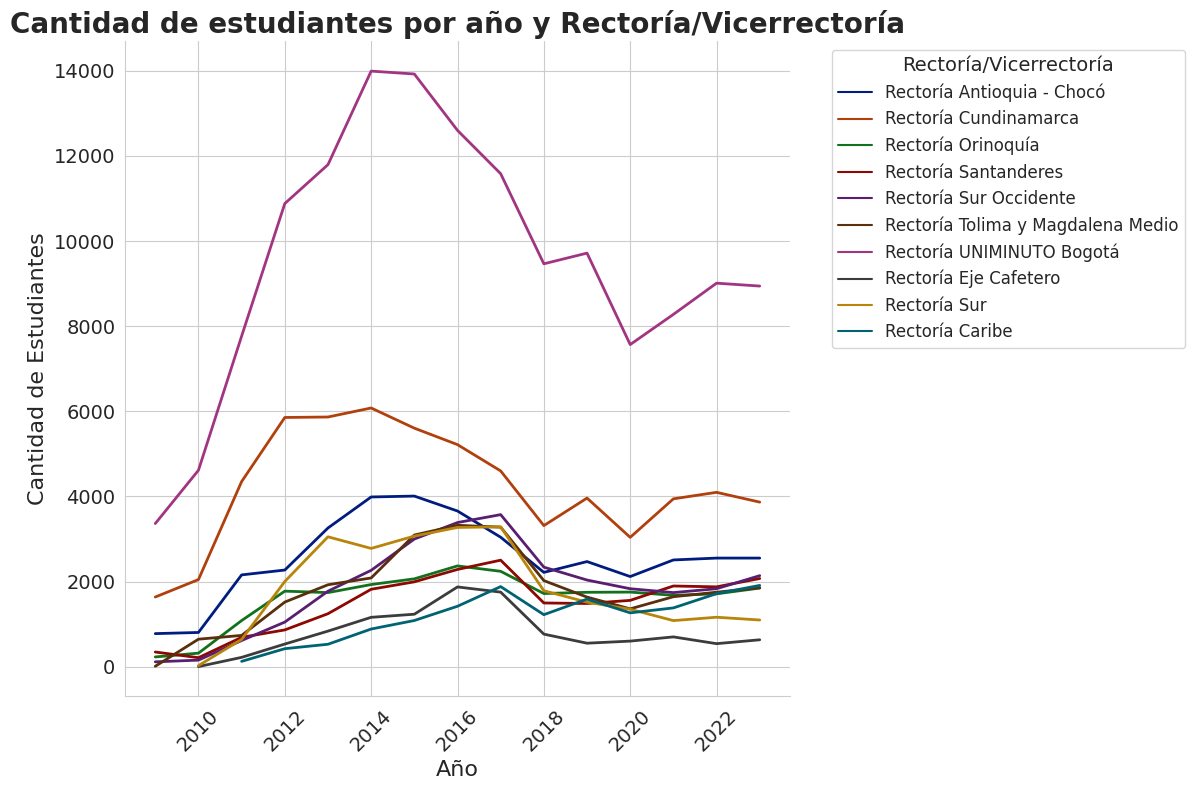

In [ ]:
df['semestre'] = df['Año Semestre'].str.split('-').str.get(1)
df['ano'] = df['Año Semestre'].str.split('-').str.get(0)

# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Rectoría/Vicerrectoría', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Rectoría/Vicerrectoría'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Rectoría/Vicerrectoría', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Rectoría/Vicerrectoría', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Rectoría/Vicerrectoría', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

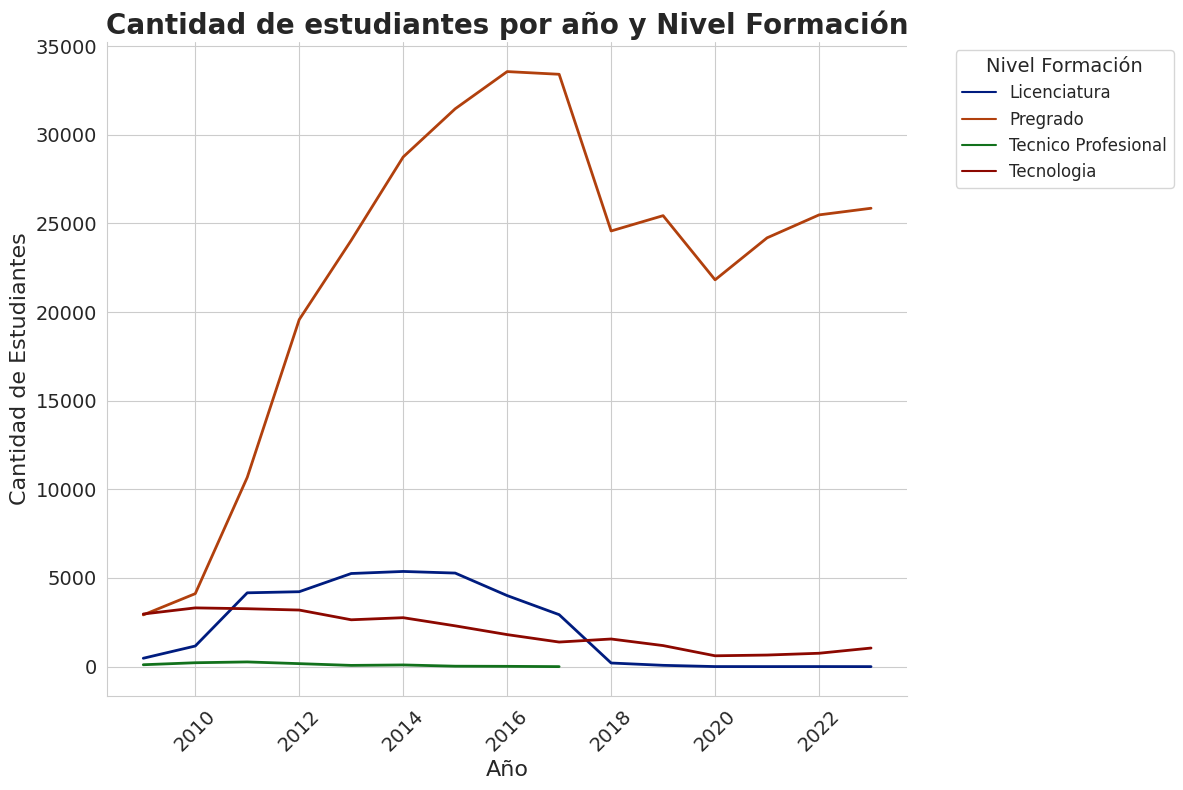

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Nivel Formación', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Nivel Formación'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Nivel Formación', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Nivel Formación', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Nivel Formación', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

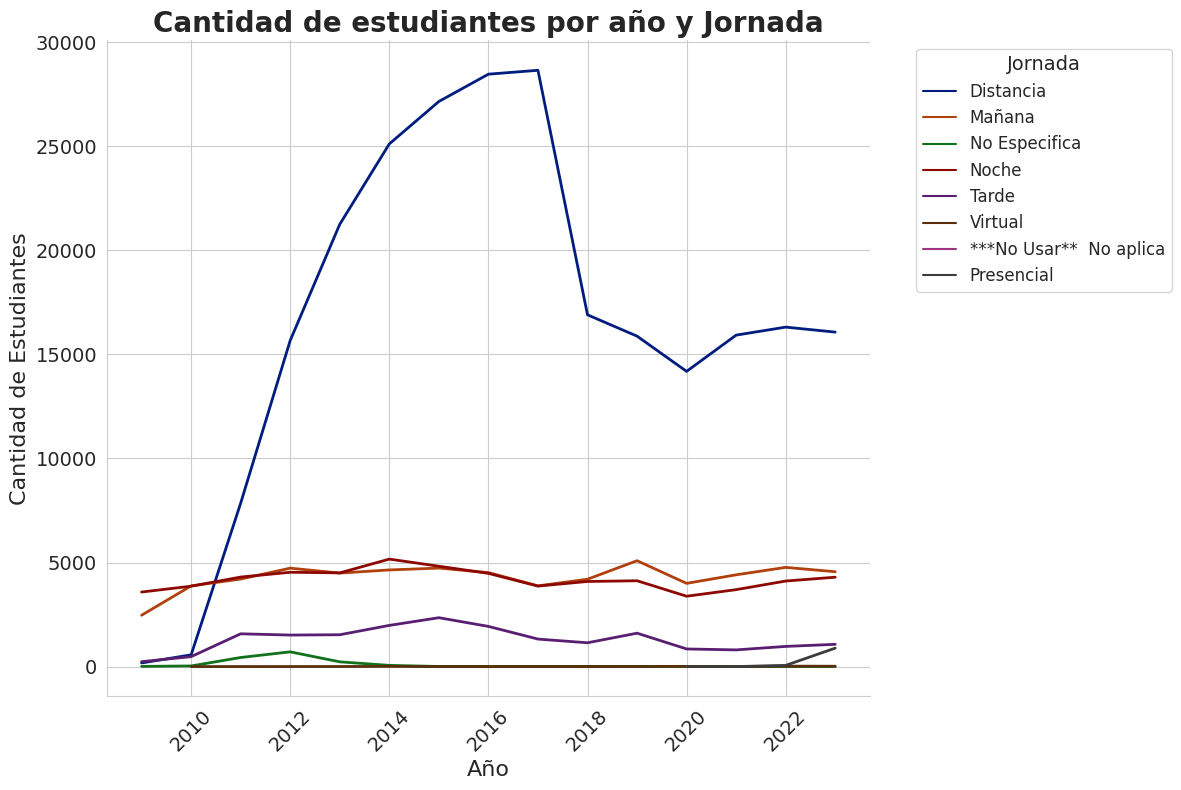

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Jornada', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Jornada'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Jornada', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Jornada', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Jornada', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

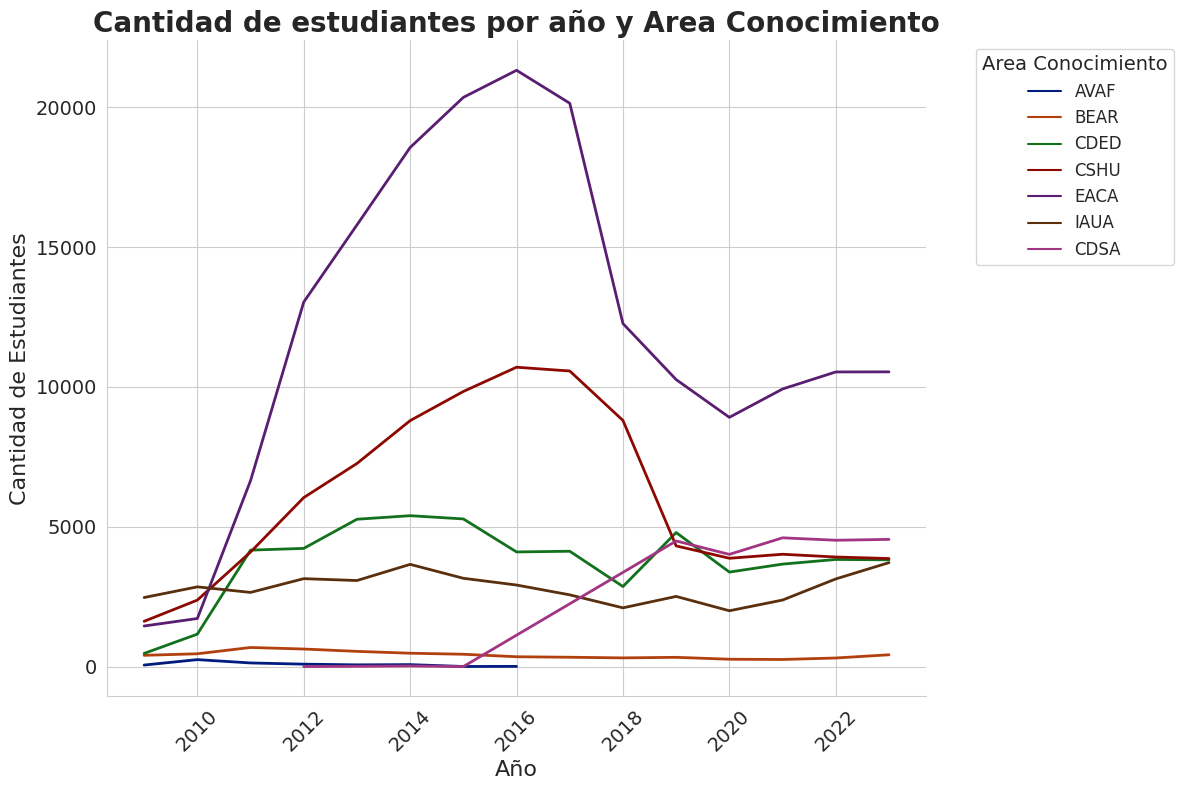

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Area Conocimiento', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Area Conocimiento'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Area Conocimiento', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Area Conocimiento', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Area Conocimiento', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

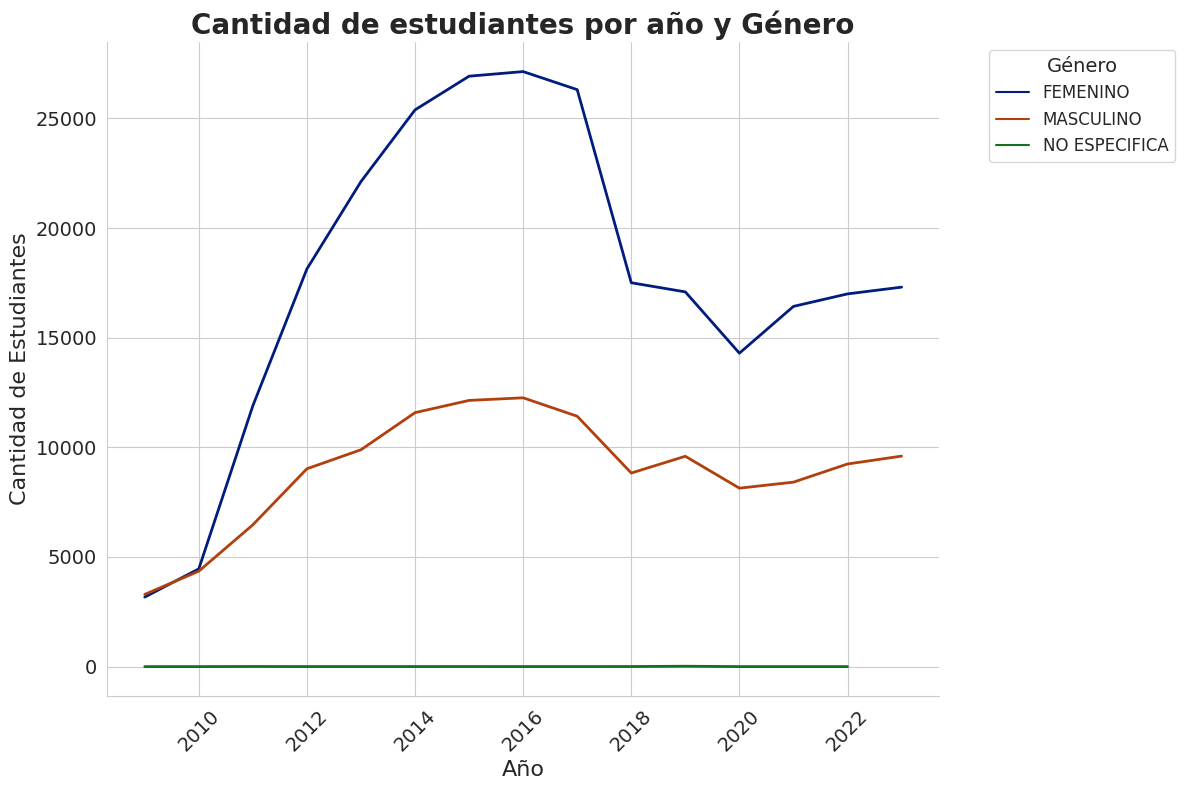

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Género', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Género'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Género', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Género', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Género', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

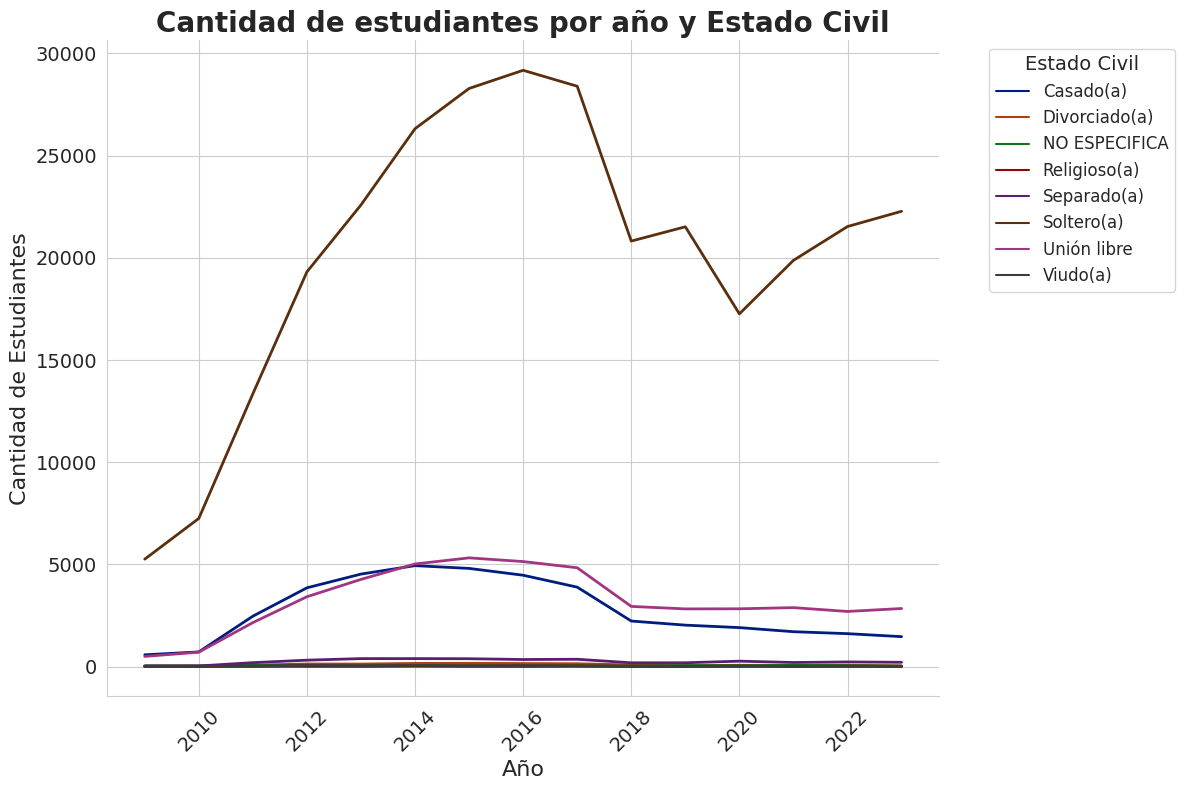

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Estado Civil', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Estado Civil'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Estado Civil', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Estado Civil', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Estado Civil', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

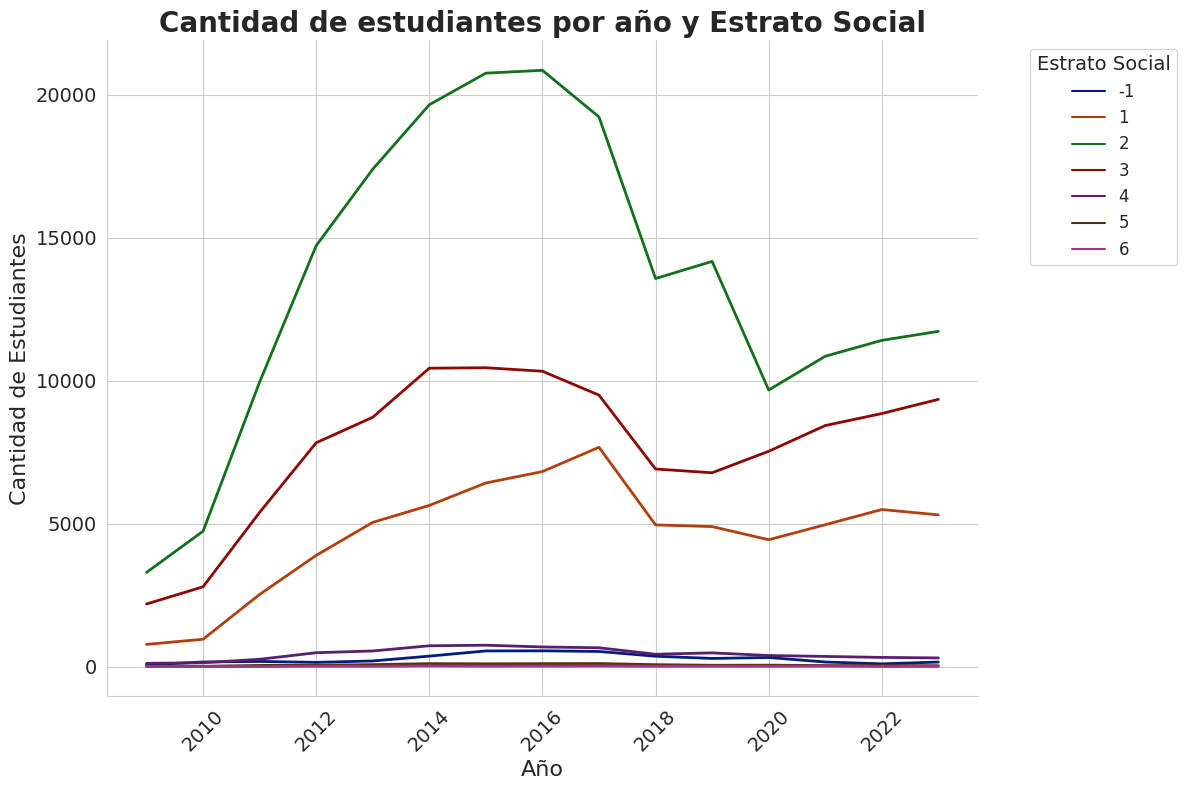

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Estrato Social', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Estrato Social'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Estrato Social', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Estrato Social', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Estrato Social', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

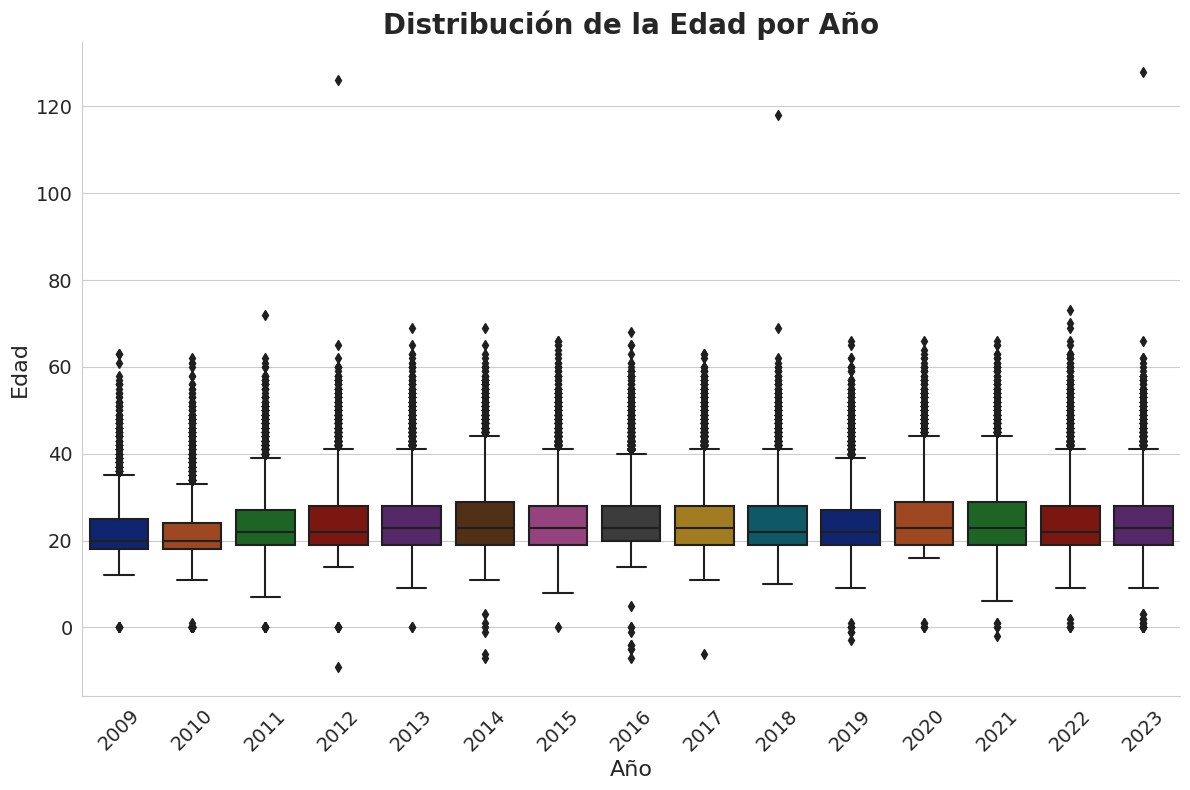

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'Edad' es una columna numérica
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df, x='ano', y='Edad', palette=colores_oscuros)
plt.title('Distribución de la Edad por Año', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Edad', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

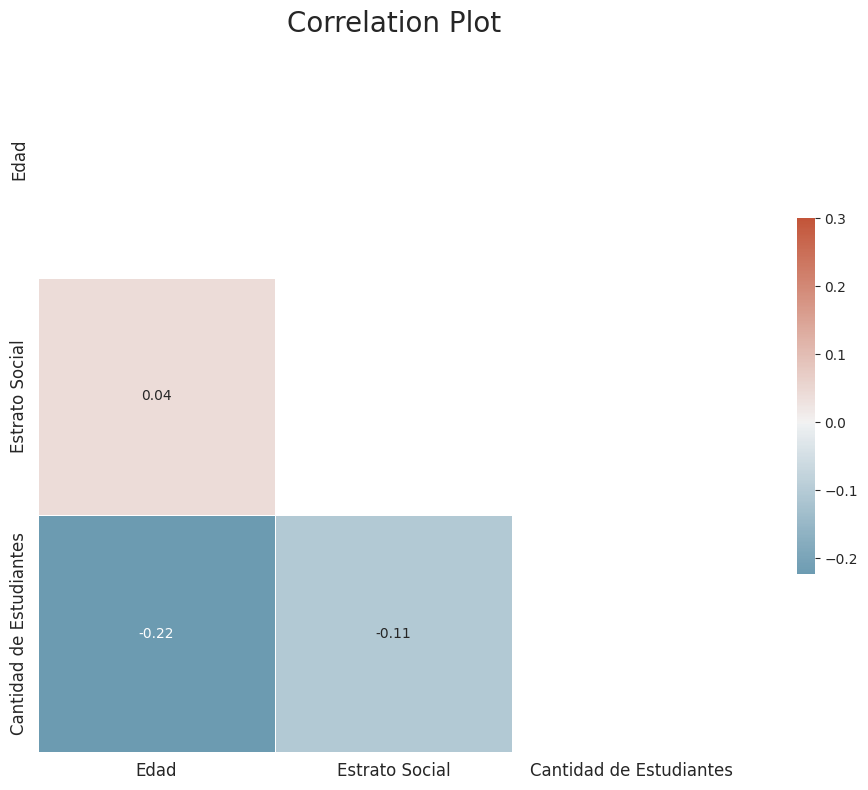

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'Edad' y 'Estrato Social' son columnas numéricas
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')
df['Estrato Social'] = pd.to_numeric(df['Estrato Social'], errors='coerce')

# Agrupa los datos por 'Edad' y 'Estrato Social', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['Edad', 'Estrato Social']).size().reset_index(name='Cantidad de Estudiantes')

# Calcula la matriz de correlación
corr = datos_agrupados.corr()

# Configura el tamaño y el estilo de la figura
plt.figure(figsize=(10, 8))
sns.set_style('white')

# Crea una máscara para la parte superior del triángulo (opcional)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configura la paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibuja el mapa de calor
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

# Configura el título y las etiquetas
plt.title('Correlation Plot', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [ ]:
revisar = df[df.semestre=='01']
revisar['Cuatrimestre población'].value_counts(normalize=True)


Semestre 1        0.752119
cuatrimestre 1    0.133096
cuatrimestre 2    0.114760
Curso libre       0.000021
Semestre 2        0.000004
Name: Cuatrimestre población, dtype: float64

17 a 21 anos

In [ ]:
df.columns

Index(['Año Semestre', 'Cuatrimestre población', 'Código Estudiante Banner',
       'Fecha Nacimiento', 'Sede', 'Código Sede', 'Rectoría/Vicerrectoría',
       'Nivel Académico', 'Nivel Formación', 'Programa', 'Jornada',
       'Código Programa', 'Snies', 'Descripción Metodología',
       'Area Conocimiento', 'Código Periodo Académico Cohorte ',
       'Código Periodo Académico', 'Tipo Estudiante', 'Edad', 'Género',
       'Estado Civil', 'Estrato Social', 'Lugar Residencia', 'semestre',
       'ano'],
      dtype='object')

In [ ]:
df['Estrato Social'].value_counts(normalize=True)*100

 2    50.590421
 3    28.928481
 1    17.487564
 4     1.672754
-1     1.042655
 5     0.225554
 6     0.052571
Name: Estrato Social, dtype: float64

In [ ]:
df['Cuatrimestre población'].unique()

array(['cuatrimestre 1', 'Semestre 1', 'Cuatrimestre 3', 'Semestre 2',
       'cuatrimestre 2', 'Curso libre'], dtype=object)

# 3. Preparación de los datos

In [ ]:
df = df[df.Jornada!= '***No Usar**  No aplica']
df = df[df['Cuatrimestre población']!='Curso libre']
df_final = df[['ano', 'Cuatrimestre población', 'Sede', 'Rectoría/Vicerrectoría', 'Fecha Nacimiento', 'Descripción Metodología', 'Código Estudiante Banner']]
df_final

,ano,Cuatrimestre población,Sede,Rectoría/Vicerrectoría,Fecha Nacimiento,Descripción Metodología,Código Estudiante Banner
0,2009,cuatrimestre 1,COA ENGATIVA DIST,Rectoría UNIMINUTO Bogotá,6/03/83,Distancia Tradicional,000109692
1,2009,cuatrimestre 1,COA ENGATIVA DIST,Rectoría UNIMINUTO Bogotá,5/03/86,Distancia Tradicional,000111887
2,2009,Semestre 1,COA SOACHA,Rectoría Cundinamarca,18/02/86,Presencial,000004566
3,2009,Semestre 1,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,6/02/87,Presencial,000005091
4,2009,Semestre 1,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,25/08/92,Presencial,000006784
...,...,...,...,...,...,...,...
399456,2023,Semestre 2,COA BUENAVENTURA,Rectoría Sur Occidente,19/10/04,Presencial,951576
399457,2023,Semestre 2,COA IBAGUE,Rectoría Tolima y Magdalena Medio,19/11/04,Distancia Tradicional,951775
399458,2023,Semestre 2,COA CUCUTA,Rectoría Santanderes,12/10/82,Distancia Tradicional,952042
399459,2023,Semestre 2,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,25/07/76,Presencial,52186441


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

df_final['semestre'] = np.where(
    df_final['Cuatrimestre población'].isin(['cuatrimestre 1', 'Semestre 1', 'cuatrimestre 2']),
    1,
    2
)
df_final = df_final.rename(columns={
    'Rectoría/Vicerrectoría': 'Rectoria',
    'Descripción Metodología': 'Modalidad'
})

# Asegúrate de que 'Fecha Nacimiento' esté en formato datetime
df_final['Fecha Nacimiento'] = pd.to_datetime(df_final['Fecha Nacimiento'])

# Paso 2: Calcular la edad
# Asumiendo que la columna 'ano' contiene el año actual o un año específico
df_final['edad'] = df_final['ano'] - df_final['Fecha Nacimiento'].dt.year


df_final['objetivo'] = df_final['edad'].apply(lambda x: 1 if 17 <= x <= 21 else 0)


# Paso 3: Eliminar la columna 'Fecha Nacimiento'
df_final = df_final.drop(columns=['Fecha Nacimiento', 'Cuatrimestre población', 'edad'])

# Mostrar el DataFrame actualizado
df_final

,ano,Sede,Rectoria,Modalidad,Código Estudiante Banner,semestre,objetivo
0,2009,COA ENGATIVA DIST,Rectoría UNIMINUTO Bogotá,Distancia Tradicional,000109692,1,0
1,2009,COA ENGATIVA DIST,Rectoría UNIMINUTO Bogotá,Distancia Tradicional,000111887,1,0
2,2009,COA SOACHA,Rectoría Cundinamarca,Presencial,000004566,1,0
3,2009,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,Presencial,000005091,1,0
4,2009,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,Presencial,000006784,1,1
...,...,...,...,...,...,...,...
399456,2023,COA BUENAVENTURA,Rectoría Sur Occidente,Presencial,951576,2,1
399457,2023,COA IBAGUE,Rectoría Tolima y Magdalena Medio,Distancia Tradicional,951775,2,1
399458,2023,COA CUCUTA,Rectoría Santanderes,Distancia Tradicional,952042,2,0
399459,2023,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,Presencial,52186441,2,0


In [ ]:
def update_sede(row):
    if row['Modalidad'] == "Distancia Tradicional" and row['Sede'] == "CERES CIUDAD BOLIVAR":
        return "COA CD BOLIVAR DIST"
    elif row['Modalidad'] == "Presencial" and row['Sede'] == "CERES CIUDAD BOLIVAR":
        return "COA CD BOLIVAR PRES"
    elif row['Modalidad'] == "Distancia Tradicional" and row['Sede'] == "CO BOSA":
        return "COA BOSA DIST"
    elif row['Modalidad'] == "Presencial" and row['Sede'] == "CO BOSA":
        return "COA BOSA PRES"
    elif row['Modalidad'] == "Distancia Tradicional" and row['Sede'] == "CO KENNEDY":
        return "COA KENNEDY DIST"
    elif row['Modalidad'] == "Presencial" and row['Sede'] == "CO KENNEDY":
        return "COA KENNEDY PRES"
    elif row['Modalidad'] == "Distancia Tradicional" and row['Sede'] == "CO RAFAEL URIBE":
        return "COA RAFAEL URIBE DIST"
    elif row['Modalidad'] == "Presencial" and row['Sede'] == "CO RAFAEL URIBE":
        return "COA RAFAEL URIBE PRES"
    elif row['Modalidad'] == "CO CANDELARIA":
        return "COA ENGATIVA PRES"
    elif row['Modalidad'] == "CO TUNAL":
        return "COA ENGATIVA PRES"
    elif row['Modalidad'] == "Ceres Valle de Aburrá":
        return "COA BELLO"
    elif row['Modalidad'] == "CERES PRADO CALI":
        return "COA CALI"
    else:
        return row['Modalidad']

df_final['Modalidad'] = df_final.apply(update_sede, axis=1)
df_final['Sede'] = df_final['Sede'].replace('^COA|^CO', 'CU', regex=True)


def update_rectoria(row):
    if row['Rectoria'] == "Vicerrectoría Regional Bogotá Sur":
        return "Rectoría UNIMINUTO Bogotá"
    else:
        return row['Rectoria']

df_final['Rectoria'] = df_final.apply(update_rectoria, axis=1)

In [ ]:
df_final.columns

Index(['ano', 'Sede', 'Rectoria', 'Modalidad', 'Código Estudiante Banner',
       'semestre', 'objetivo'],
      dtype='object')

In [ ]:
import pandas as pd

# Asumiendo que ya tienes df_final
#df_agrupado = df_final.groupby(['ano', 'semestre', 'Rectoria', 'Sede', 'Modalidad', 'objetivo']).size().reset_index(name='y')
df_agrupado = df_final.groupby(['ano', 'semestre', 'Rectoria', 'Modalidad', 'objetivo']).size().reset_index(name='y')


# Identificador unico por timeseries.
#df_agrupado['unique_id'] = df_agrupado.groupby(['Rectoria', 'Sede', 'Modalidad', 'objetivo']).ngroup() + 1
df_agrupado['unique_id'] = df_agrupado.groupby(['Rectoria', 'Modalidad', 'objetivo']).ngroup() + 1

def grouped_data(df):
    if df.empty:
        print("DataFrame is empty.")
        return df
    if "unique_id" not in df.columns:
        print("'unique_id' column does not exist in the DataFrame.")
        return df

    grouped = df.groupby(["unique_id"], as_index=False).agg(
        {"y": ["mean", "std"]}
    )
    grouped.columns = grouped.columns.map("_".join)
    grouped = grouped.reset_index(drop=True).rename(
        columns={"unique_id_": "unique_id"}
    )
    grouped["y_std"] = grouped["y_std"].fillna(0)
    grouped["upper_limit"] = grouped["y_mean"] + 3 * grouped["y_std"]
    grouped["lower_limit"] = grouped["y_mean"] - 3 * grouped["y_std"]

    df = df.merge(grouped, how="left", on="unique_id")
    df.loc[
        (df["y"] > df["upper_limit"])
        | (df["y"] < df["lower_limit"]),
        "y",
    ] = df["y_mean"]
    df = df[df.y > 0]

    return df

df_agrupado = grouped_data(df_agrupado)

# Asumiendo que df_transformed es tu DataFrame y que 'ano' y 'semestre' son las columnas de interés
df_agrupado['time_index'] = (df_agrupado['ano'] - df_agrupado['ano'].min()) * 2 + df_agrupado['semestre']

# Convertir 'time_index' a entero si es necesario (por si 'semestre' es una columna de tipo string)
df_agrupado['time_index'] = df_agrupado['time_index'].astype(int)


df_agrupado

,ano,semestre,Rectoria,Modalidad,objetivo,y,unique_id,y_mean,y_std,upper_limit,lower_limit,time_index
0,2009,1,Rectoría Antioquia - Chocó,Presencial,0,201.0,3,306.000000,79.033384,543.100153,68.899847,1
1,2009,1,Rectoría Antioquia - Chocó,Presencial,1,177.0,4,357.433333,130.572924,749.152106,-34.285439,1
2,2009,1,Rectoría Cundinamarca,Distancia Tradicional,0,41.0,9,615.800000,351.826505,1671.279515,-439.679515,1
3,2009,1,Rectoría Cundinamarca,Distancia Tradicional,1,10.0,10,386.600000,257.380250,1158.740750,-385.540750,1
4,2009,1,Rectoría Cundinamarca,Presencial,0,281.0,11,357.800000,104.241563,670.524689,45.075311,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1000,2023,2,Rectoría Tolima y Magdalena Medio,Presencial,1,128.0,36,54.352941,67.805735,257.770145,-149.064263,30
1001,2023,2,Rectoría UNIMINUTO Bogotá,Distancia Tradicional,0,912.0,37,1853.733333,1236.913147,5564.472774,-1857.006108,30
1002,2023,2,Rectoría UNIMINUTO Bogotá,Distancia Tradicional,1,264.0,38,397.800000,246.641356,1137.724069,-342.124069,30
1003,2023,2,Rectoría UNIMINUTO Bogotá,Presencial,0,757.0,39,896.433333,212.651355,1534.387399,258.479268,30


In [ ]:
a = df_agrupado[['ano', 'semestre', 'time_index', 'Rectoria']]
unique_rows = a.drop_duplicates()
unique_rows

,ano,semestre,time_index,Rectoria
0,2009,1,1,Rectoría Antioquia - Chocó
2,2009,1,1,Rectoría Cundinamarca
6,2009,1,1,Rectoría Orinoquía
10,2009,1,1,Rectoría Santanderes
13,2009,1,1,Rectoría Sur Occidente
...,...,...,...,...
985,2023,2,30,Rectoría Santanderes
989,2023,2,30,Rectoría Sur
993,2023,2,30,Rectoría Sur Occidente
997,2023,2,30,Rectoría Tolima y Magdalena Medio


In [ ]:
# Combine 'ano' and 'semestre' into a single period column
unique_rows['period'] = unique_rows['ano'].astype(str) + '-' + unique_rows['semestre'].astype(str)

# Grouping by 'Rectoria' and performing the aggregation
grouped = unique_rows.groupby('Rectoria').agg({
    'period': ['min', 'max'],
    'time_index': 'count'
}).reset_index()

# Flattening the column names and renaming for clarity
grouped.columns = ['_'.join(col).strip() if col[1] else col[0] for col in grouped.columns.values]
grouped.rename(columns={
    'period_min': 'Start_Period',
    'period_max': 'End_Period',
    'time_index_count': 'Num_Semesters'
}, inplace=True)

grouped[['Rectoria', 'Num_Semesters', 'Start_Period', 'End_Period']]


,Rectoria,Num_Semesters,Start_Period,End_Period
0,Rectoría Antioquia - Chocó,30,2009-1,2023-2
1,Rectoría Caribe,26,2011-1,2023-2
2,Rectoría Cundinamarca,30,2009-1,2023-2
3,Rectoría Eje Cafetero,26,2010-1,2023-2
4,Rectoría Orinoquía,30,2009-1,2023-2
5,Rectoría Santanderes,30,2009-1,2023-2
6,Rectoría Sur,27,2010-2,2023-2
7,Rectoría Sur Occidente,30,2009-1,2023-2
8,Rectoría Tolima y Magdalena Medio,30,2009-1,2023-2
9,Rectoría UNIMINUTO Bogotá,30,2009-1,2023-2


In [ ]:
df_agrupado.unique_id.nunique()

40

In [ ]:
df_agrupado.to_excel('por_rectoria.xlsx')

# 4. Modelado

Se realizaran una validación de diferentes metodos y X, para validar la mejor estrategia.

In [ ]:
!git clone https://github.com/jsebastianquiroga/analitica_ia_puj.git

Cloning into 'analitica_ia_puj'...
remote: Enumerating objects: 686, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 686 (delta 156), reused 162 (delta 121), pack-reused 475
Receiving objects: 100% (686/686), 17.05 MiB | 15.36 MiB/s, done.
Resolving deltas: 100% (496/496), done.


In [ ]:
pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 20.8 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.1.8-py3-none-any.whl size=158201 sha256=8899e3c5c32316b6c09c67c6259291118274a7f2e31b658cc0548b8add8e7401
  Stored in directory: /root/.cache/pip/wheels/a4/2b/3e/8ac985ad100a8f27de940864344fe14f47bc3d2fed7f29bf70
Successfully built fugue-sql-antlr


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [ ]:
pip install lightgbm==3.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [ ]:
parar

NameError: ignored

#4.1. Matriz original division en train y test.

In [ ]:
import pandas as pd

# Creando el dataset de entrenamiento
train = df_agrupado.loc[df_agrupado['time_index'] <= 20]

# Creando el dataset de validación
validation = df_agrupado.loc[(df_agrupado['time_index'] >= 21) & (df_agrupado['time_index'] <= 25)]

# Creando el dataset de prueba
test = df_agrupado.loc[(df_agrupado['time_index'] >= 26) & (df_agrupado['time_index'] <= 30)]

In [ ]:
num_time_index_train = train['time_index'].nunique()
num_time_index_validation = validation['time_index'].nunique()
num_time_index_test = test['time_index'].nunique()

print(f"Number of unique time indices in train: {num_time_index_train}")
print(f"Number of unique time indices in validation: {num_time_index_validation}")
print(f"Number of unique time indices in test: {num_time_index_test}")

## 4.1.1. Entrenamiento modelos.

In [ ]:
df = train.append(validation)

from analitica_ia_puj.Tesis.models import Autoregresive, GradientBoostingModels


# se realiza la predicción de los datos reales menos los ultimos 'meses_predecir' seleccionado, tanto en el ETL como parametros de entrada.
# validacion, es una copia del test con las predicciones para elegir el mejor modelo
forecasting = Autoregresive(train, validation, df, season_length=2, semestres_predecir=5)
validacion = forecasting.run_workflow()

train_f = train.append(validation)
test_f = test.copy()
df_f = train_f.append(test_f)

forecasting_2 = Autoregresive(
    train_f, test_f, df_f, season_length=2, semestres_predecir=5)


teste = forecasting_2.run_workflow()
#forecasting.save_model()  # Aquí guardamos el modelo

# se crean 3 modelos de regresión con boosting, toma como datos de entrada train, los datos menos los 'meses_predecir' seleccionado,
# validación es el periodo dado por esos últimos n meses, test_f datos de inferencia, y para validación y teste, son  matrices con inferencias del modelo anterior.
fore = GradientBoostingModels(train, validation, test_f, validacion, teste)
validacion, teste = fore.pipeline()
#fore.save_models()   # Guardar los modelos
validacion


In [ ]:
teste

#4.2 crear dos datasets distintos, uno para cada semestre para predecir anual, siendo dos modelos que predigan.

In [ ]:
# Assuming df_agrupado is already loaded as per your provided code

# Splitting the dataset into two datasets based on the semester
df_semester_1 = df_agrupado[df_agrupado['semestre'] == 1].copy()  # Using copy() to avoid warnings
df_semester_2 = df_agrupado[df_agrupado['semestre'] == 2].copy()

# Function to reset time_index for continuity
def reset_time_index(df):
    sorted_unique_time = sorted(df['time_index'].unique())
    mapping = {time: idx+1 for idx, time in enumerate(sorted_unique_time)}
    df['time_index'] = df['time_index'].map(mapping)
    return df

def split_data_exact(df):
    unique_time_indices = sorted(df['time_index'].unique())

    train_cutoff = unique_time_indices[8] if len(unique_time_indices) > 9 else unique_time_indices[-1]
    validation_cutoff = unique_time_indices[11] if len(unique_time_indices) > 12 else unique_time_indices[-1]

    train = df[df['time_index'] <= train_cutoff]
    validation = df[(df['time_index'] > train_cutoff) & (df['time_index'] <= validation_cutoff)]
    test = df[df['time_index'] > validation_cutoff]

    return train, validation, test

# Resetting time_index for continuity
df_semester_1 = reset_time_index(df_semester_1)
df_semester_2 = reset_time_index(df_semester_2)

# Getting train, validation, and test datasets for both semesters using the exact split function
train_1, validation_1, test_1 = split_data_exact(df_semester_1)
train_2, validation_2, test_2 = split_data_exact(df_semester_2)

# Counting unique time_index values for each dataset
num_time_index_train_1 = train_1['time_index'].nunique()
num_time_index_validation_1 = validation_1['time_index'].nunique()
num_time_index_test_1 = test_1['time_index'].nunique()

num_time_index_train_2 = train_2['time_index'].nunique()
num_time_index_validation_2 = validation_2['time_index'].nunique()
num_time_index_test_2 = test_2['time_index'].nunique()

print(f"Number of unique time indices in train_1: {num_time_index_train_1}")
print(f"Number of unique time indices in validation_1: {num_time_index_validation_1}")
print(f"Number of unique time indices in test_1: {num_time_index_test_1}")

print(f"Number of unique time indices in train_2: {num_time_index_train_2}")
print(f"Number of unique time indices in validation_2: {num_time_index_validation_2}")
print(f"Number of unique time indices in test_2: {num_time_index_test_2}")

## 4.2.1 Semestre 1 predicción

In [ ]:
df_1 = train_1.append(validation_1)

from analitica_ia_puj.Tesis.models import Autoregresive, GradientBoostingModels


# se realiza la predicción de los datos reales menos los ultimos 'meses_predecir' seleccionado, tanto en el ETL como parametros de entrada.
# validacion, es una copia del test con las predicciones para elegir el mejor modelo
forecasting_1 = Autoregresive(train_1, validation_1, df_1, season_length=2, semestres_predecir=3)
validacion_1 = forecasting_1.run_workflow()

train_f_1 = train_1.append(validation_1)
test_f_1 = test_1.copy()
df_f_1 = train_f_1.append(test_f_1)

forecasting_2_1 = Autoregresive(
    train_f_1, test_f_1, df_f_1, season_length=2, semestres_predecir=3)


teste_1 = forecasting_2_1.run_workflow()
#forecasting.save_model()  # Aquí guardamos el modelo

# se crean 3 modelos de regresión con boosting, toma como datos de entrada train, los datos menos los 'meses_predecir' seleccionado,
# validación es el periodo dado por esos últimos n meses, test_f datos de inferencia, y para validación y teste, son  matrices con inferencias del modelo anterior.
fore_1 = GradientBoostingModels(train_1, validation_1, test_f_1, validacion_1, teste_1)
validacion_1, teste_1 = fore_1.pipeline()
#fore.save_models()   # Guardar los modelos
validacion_1


## 4.2.2. Prediccion semestre 2

In [ ]:
df_2 = train_2.append(validation_2)

from analitica_ia_puj.Tesis.models import Autoregresive, GradientBoostingModels


# se realiza la predicción de los datos reales menos los ultimos 'meses_predecir' seleccionado, tanto en el ETL como parametros de entrada.
# validacion, es una copia del test con las predicciones para elegir el mejor modelo
forecasting_2 = Autoregresive(train_2, validation_2, df_2, season_length=2, semestres_predecir=3)
validacion_2 = forecasting_2.run_workflow()

train_f_2 = train_2.append(validation_2)
test_f_2 = test_2.copy()
df_f_2 = train_f_2.append(test_f_2)

forecasting_2_2 = Autoregresive(
    train_f_2, test_f_2, df_f_2, season_length=2, semestres_predecir=3)


teste_2 = forecasting_2_2.run_workflow()
#forecasting.save_model()  # Aquí guardamos el modelo

# se crean 3 modelos de regresión con boosting, toma como datos de entrada train, los datos menos los 'meses_predecir' seleccionado,
# validación es el periodo dado por esos últimos n meses, test_f datos de inferencia, y para validación y teste, son  matrices con inferencias del modelo anterior.
fore_2 = GradientBoostingModels(train_2, validation_2, test_f_2, validacion_2, teste_2)
validacion_2, teste_2 = fore_2.pipeline()
#fore.save_models()   # Guardar los modelos
validacion_2


# 4.3 agregar al df original variables predictoras de passport.

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error
from joblib import dump
import os

class VARIMAXForecast:
    def __init__(self, train, test, df, exog_vars, maxlags=3, periodos_predecir=2):
        self.train = train
        self.test = test
        self.df = df
        self.exog_vars = exog_vars
        self.maxlags = maxlags
        self.periodos_predecir = periodos_predecir  # Cambiado a periodos para ser más genérico
        self.Y_hat_df = None
        self.model = None

    def format_data(self):
        self._convert_to_datetime()
        self.train.sort_values('ds', inplace=True)
        train_endog, test_endog, df_endog = self._pivot_data()
        train_exog = self._prepare_exogenous_variables()
        self._handle_na_and_infinities(train_exog)

        return train_endog, train_exog, test_endog, df_endog

    def _convert_to_datetime(self):
        # Asegurarse de que el dataset contiene 'ano' y 'semestre'
        for dataset in [self.train, self.test, self.df]:
            if 'ano' in dataset.columns and 'semestre' in dataset.columns:
                dataset['semestre'] = pd.to_numeric(dataset['semestre'], errors='coerce')
                if dataset['semestre'].isnull().any():
                    raise ValueError("La columna 'semestre' debe ser numérica y no contener NaN después de la conversión.")
                # Asegurarse de que el semestre se convierte correctamente
                dataset['ds'] = pd.to_datetime(
                    dataset['ano'].astype(str) +
                    ((dataset['semestre'] - 1) * 6 + 1).astype(str).str.zfill(2),
                    format='%Y%m'
                )
            else:
                raise KeyError("Faltan las columnas 'ano' y/o 'semestre' en el dataset.")

    def _pivot_data(self):

        train_endog = self.train.pivot(index='ds', columns='unique_id', values='y').apply(lambda col: col.fillna(col.mean()))
        test_endog = self.test.pivot(index='ds', columns='unique_id', values='y').apply(lambda col: col.fillna(col.mean()))
        df_endog = self.df.pivot(index='ds', columns='unique_id', values='y').apply(lambda col: col.fillna(col.mean()))

        return train_endog, test_endog, df_endog

    def _prepare_exogenous_variables(self):
        train_exog = self.train[self.exog_vars].apply(lambda col: col.fillna(col.mean()))
        train_exog['ds'] = self.train['ds']
        train_exog = train_exog.groupby('ds').mean().reset_index()
        train_exog = train_exog.set_index('ds')
        return train_exog

    def _handle_na_and_infinities(self, train_exog):
        # Check for infinite values and replace them with NaN
        train_exog.replace([np.inf, -np.inf], np.nan, inplace=True)

        # Now try to fill NaN values with the mean
        final_train_exog = train_exog.fillna(train_exog.mean())

        # Debugging: check for NaNs after filling inside the class
        print("Inside _handle_na_and_infinities, NaN counts after filling with mean:")
        print(train_exog.isna().sum())

        # Check if there are still NaNs
        if train_exog.isna().any().any():
            # Find the rows and columns that have NaNs
            nan_rows = train_exog[train_exog.isna().any(axis=1)]
            print("Rows with NaNs:")
            print(nan_rows)

        # Existing assertion checks...
        assert not train_exog.isna().any().any(), "NaNs remain in exogenous variables after filling."

    def setup_model_and_forecast(self, train_endog, train_exog):
        model = VARMAX(endog=train_endog, exog=train_exog, order=(self.maxlags, 0))
        self.model = model.fit(disp=False)

        # Asegurarse de que la futura información exógena coincida con la periodicidad semestral
        last_date = train_endog.index[-1]
        future_dates = pd.date_range(start=last_date, periods=self.periodos_predecir * 2, freq='6M')  # Cada '6M' para semestres
        exog_future = self.test[self.exog_vars].reindex(future_dates).fillna(method='ffill')
        exog_future = exog_future.loc[self.test['ds'].isin(future_dates)]
        self.Y_hat_df = self.model.get_forecast(steps=self.periodos_predecir, exog=exog_future).predicted_mean

    def post_process(self, predictions):
        predictions = np.maximum(predictions, 0)  # Ensuring predictions are non-negative
        return predictions

    def merge_with_validation(self, predictions):
        self.df['y_VARMAX'] = predictions.reindex(self.df.index).values
        return self.df


    def standardize_data(self, data):
        scaler = StandardScaler()
        standardized_data = scaler.fit_transform(data)
        self.scaler = scaler  # Guarda el objeto scaler para inversión posterior
        return standardized_data


    def check_stationarity(self, time_series, significance_level=0.05):
        p_value = adfuller(time_series)[1]
        return p_value < significance_level

    def difference_data_if_needed(self, data):
        differenced_data = data.copy()
        for column in data:
            if not self.check_stationarity(data[column]):
                differenced_data[column] = data[column].diff().dropna()
        return differenced_data

    def standardize_data(self, data):
        scalers = {}
        standardized_data = data.copy()
        for column in data:
            scaler = StandardScaler()
            standardized_data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1)).flatten()
            scalers[column] = scaler
        self.scalers = scalers  # Guardar los objetos scaler
        return standardized_data

    def invert_transformations(self, original_data, standardized_data, differenced_columns):
        inverted_data = standardized_data.copy()
        for column in standardized_data:
            # Invertir estandarización
            inverted_data[column] = self.scalers[column].inverse_transform(standardized_data[column].reshape(-1, 1)).flatten()
            # Invertir diferenciación si fue aplicada
            if column in differenced_columns:
                inverted_data[column] = original_data[column].iloc[0] + inverted_data[column].cumsum()
        return inverted_data

    # ... [resto de tu clase] ...

    def run_workflow(self):
        train_endog, train_exog, test_endog, df_endog = self.format_data()

        # Chequear estacionariedad y diferenciar si es necesario
        train_endog_diff = self.difference_data_if_needed(train_endog)
        train_exog_diff = self.difference_data_if_needed(train_exog)

        # Estandarizar los datos
        train_endog_standardized = self.standardize_data(train_endog_diff)
        train_exog_standardized = self.standardize_data(train_exog_diff)

        # Configurar y ajustar el modelo
        self.setup_model_and_forecast(train_endog_standardized, train_exog_standardized)

        # Predecir y luego invertir las transformaciones
        predictions_standardized = self.post_process(self.Y_hat_df)
        predictions = self.invert_transformations(train_endog, predictions_standardized, train_endog_diff.columns)

        result = self.merge_with_validation(predictions)
        return result


    def save_model(self):
        today = datetime.now().strftime("%Y-%m-%d")
        directory = "Modelos"
        if not os.path.exists(directory):
            os.makedirs(directory)
        filename = f"{directory}/VARIMAX_{today}.joblib"
        dump(self.model, filename)
        print(f"Model saved as {filename}")


In [ ]:
import pandas as pd

# Asumiendo que tu archivo se llama 'archivo.xlsx'
df = pd.read_excel('/content/Variables macroeco.xlsx')

df_agrupado_f = df_agrupado.copy()
df_agrupado_f = df_agrupado_f.drop(columns=['Rectoria', 'Modalidad', 'objetivo', 'y_mean', 'y_std', 'upper_limit', 'lower_limit'], axis=1)
df_agrupado_f['y'] = df_agrupado_f['y'].astype(int)

import pandas as pd

# 1. Separar el año y el cuatrimestre
df['ano'] = df['Category'].str.split(' ').str[1]
df['cuatrimestres'] = df['Category'].str.split(' ').str[0]

# 2. Crear una nueva columna para el semestre
df['semestre'] = df['cuatrimestres'].map({'Q1': '1', 'Q2': '1', 'Q3': '2', 'Q4': '2'})

# 3. Agrupar por año y semestre
grouped = df.groupby(['ano', 'semestre']).sum()

# 4. Reset index para un mejor formato
grouped = grouped.reset_index()

# Convert 'ano' and 'semestre' to int and str respectively in df_agrupado
df_agrupado_f['ano'] = df_agrupado_f['ano'].astype(int)
df_agrupado_f['semestre'] = df_agrupado_f['semestre'].astype(str)

# Convert 'ano' and 'semestre' to int and str respectively in grouped
grouped['ano'] = grouped['ano'].astype(int)
grouped['semestre'] = grouped['semestre'].astype(str)

# Now attempt the merge again
merged_df = pd.merge(df_agrupado_f, grouped, on=['ano', 'semestre'], how='inner')

# If there are still issues, check for NaN values or other anomalies in the 'ano' and 'semestre' columns
print(df_agrupado_f['ano'].shape)
print(df_agrupado_f['semestre'].shape)
print(grouped['ano'].shape)
print(grouped['semestre'].shape)

# Display the result
print(merged_df.shape)


(1005,)
(1005,)
(40,)
(40,)
(1005, 23)


In [ ]:
import pandas as pd
from analitica_ia_puj.Tesis.models import Autoregresive

# Creando el dataset de entrenamiento
train_exog = merged_df.loc[merged_df['time_index'] <= 20]

# Creando el dataset de validación
validation_exog = merged_df.loc[(merged_df['time_index'] >= 21) & (merged_df['time_index'] <= 25)]

# Creando el dataset de prueba
test_exog = merged_df.loc[(merged_df['time_index'] >= 26) & (merged_df['time_index'] <= 30)]

train_exog = train_exog.drop(columns=['time_index'], axis=1)
validation_exog = validation_exog.drop(columns=['time_index'], axis=1)
test_exog = test_exog.drop(columns=['time_index'], axis=1)

# Extraer variables exógenas
exog_columns = [
    'Current Account Balance as % of GDP', 'GDP', 'Real GDP Growth',
    'Private Final Consumption Expenditure', 'Industrial Production Index',
    'Inflation', 'Money Supply', 'Producer Price Index, Manufacturing',
    'Current Account Balance', 'Exchange Rates Against US Dollar',
    'Long-Term Interest Rate', 'Overnight Interbank Rate', 'Exports',
    'Imports', 'Trade Balance', 'Gross Fixed Capital Formation',
    'International Reserves', 'Foreign Exchange Reserves'
]
exog = merged_df[exog_columns]

In [ ]:
train_exog

,ano,semestre,y,unique_id,Current Account Balance as % of GDP,GDP,Real GDP Growth,Private Final Consumption Expenditure,Industrial Production Index,Inflation,...,Current Account Balance,Exchange Rates Against US Dollar,Long-Term Interest Rate,Overnight Interbank Rate,Exports,Imports,Trade Balance,Gross Fixed Capital Formation,International Reserves,Foreign Exchange Reserves
0,2009,1,201,3,-3,239425242,-6,160723351,185,3,...,-1693,4651,20,15,15485,15574,-89,53166131,46831,45027
1,2009,1,177,4,-3,239425242,-6,160723351,185,3,...,-1693,4651,20,15,15485,15574,-89,53166131,46831,45027
2,2009,1,41,9,-3,239425242,-6,160723351,185,3,...,-1693,4651,20,15,15485,15574,-89,53166131,46831,45027
3,2009,1,10,10,-3,239425242,-6,160723351,185,3,...,-1693,4651,20,15,15485,15574,-89,53166131,46831,45027
4,2009,1,281,11,-3,239425242,-6,160723351,185,3,...,-1693,4651,20,15,15485,15574,-89,53166131,46831,45027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,2018,2,50,34,-9,514334680,8,349237310,238,0,...,-7548,6124,14,8,21349,26800,-5451,110729628,94912,91279
623,2018,2,362,37,-9,514334680,8,349237310,238,0,...,-7548,6124,14,8,21349,26800,-5451,110729628,94912,91279
624,2018,2,161,38,-9,514334680,8,349237310,238,0,...,-7548,6124,14,8,21349,26800,-5451,110729628,94912,91279
625,2018,2,723,39,-9,514334680,8,349237310,238,0,...,-7548,6124,14,8,21349,26800,-5451,110729628,94912,91279


In [ ]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, thresh=5.0):
    # Ensure the data is numeric
    df_numeric = df.select_dtypes(include=[np.number])
    if df_numeric.shape[1] != df.shape[1]:
        non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
        print(f"Non-numeric columns will be skipped: {non_numeric_cols}")
        df = df_numeric

    # Check for non-finite values in the dataframe
    if not np.isfinite(df.values).all():
        print("Data contains non-finite values. Make sure to handle Inf and NaN values.")
        df = df.replace([np.inf, -np.inf], np.nan).dropna()
    variables = list(range(df.shape[1]))
    dropped=True
    while dropped:
        dropped=False
        vif = [variance_inflation_factor(df.iloc[:, variables].values, ix)
               for ix in range(df.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(f'Dropping {df.iloc[:, variables].columns[maxloc]} with VIF={max(vif)}')
            del variables[maxloc]
            dropped=True

    print('Remaining variables:')
    print(df.columns[variables])
    return df.iloc[:, variables]

# Preprocesamos el conjunto de entrenamiento primero
# Asumimos que train_exog es tu DataFrame de entrenamiento
exclude_vars = ['ano', 'semestre', 'unique_id', 'y']
numeric_vars = [var for var in train_exog.columns if var not in exclude_vars]

# Calculamos VIF en el conjunto de entrenamiento para eliminar colinealidades
prepared_train_exog = train_exog.copy()
selected_columns = calculate_vif(prepared_train_exog[numeric_vars], thresh=5.0).columns

# Ahora, 'selected_columns' contiene solo las columnas que no han sido eliminadas por tener un VIF alto
# Creamos un escalador usando solo las variables numéricas seleccionadas después de eliminar colinealidades
scaler = StandardScaler()
scaler.fit(prepared_train_exog[selected_columns])

# Escalamos el conjunto de entrenamiento
prepared_train_exog[selected_columns] = scaler.transform(prepared_train_exog[selected_columns])

# Escalamos el conjunto de validación y prueba usando el mismo scaler
# Nos aseguramos de aplicar el escalado solo a las columnas seleccionadas
prepared_validation_exog = validation_exog[selected_columns].copy()
prepared_test_exog = test_exog[selected_columns].copy()
merged_df_exog = merged_df[selected_columns].copy()  # Suponiendo que también tienes un DataFrame llamado merged_df

# Aplicamos el escalado a las columnas seleccionadas en los DataFrames de validación, prueba y merged
prepared_validation_exog = scaler.transform(prepared_validation_exog)
prepared_test_exog = scaler.transform(prepared_test_exog)
merged_df_exog = scaler.transform(merged_df_exog)

# Asumiendo que 'selected_columns' son las columnas seleccionadas después del proceso de VIF
# Y 'additional_columns' son las que quieres mantener además de las seleccionadas
# Tus columnas adicionales y seleccionadas
additional_columns = ['unique_id', 'ano', 'semestre', 'y']
final_columns = list(selected_columns) + additional_columns

# Filtrar las final_columns para excluir las additional_columns
exog_columns = [col for col in final_columns if col not in additional_columns]

# Ahora actualizas 'merged_df' para mantener solo esas columnas
final_merged_df = merged_df[final_columns].copy()
# Si es necesario, también puedes hacer lo mismo para 'train_exog', 'validation_exog', y 'test_exog'
final_train_exog = train_exog[final_columns].copy()
final_validation_exog = validation_exog[final_columns].copy()
final_test_exog = test_exog[final_columns].copy()


Dropping Imports with VIF=4339486747.798864
Dropping International Reserves with VIF=236522.41793559428
Dropping Producer Price Index, Manufacturing with VIF=145953.73572373192
Dropping Gross Fixed Capital Formation with VIF=9973.574041490847
Dropping Private Final Consumption Expenditure with VIF=7610.071368694857
Dropping Industrial Production Index with VIF=6118.964377173412
Dropping Exchange Rates Against US Dollar with VIF=2848.528242605804
Dropping Foreign Exchange Reserves with VIF=1752.589093664625
Dropping Current Account Balance as % of GDP with VIF=458.69392176557
Dropping Exports with VIF=338.32206631067555
Dropping Long-Term Interest Rate with VIF=33.25066191928159
Dropping Overnight Interbank Rate with VIF=24.696061754082276
Dropping Current Account Balance with VIF=16.777106764834727
Dropping Trade Balance with VIF=11.81072090209943
Dropping Inflation with VIF=5.8009096539274365
Remaining variables:
Index(['GDP', 'Real GDP Growth', 'Money Supply'], dtype='object')


In [ ]:
# Filling NaN values with the mean
final_train_exog.fillna(final_train_exog.mean(), inplace=True)

# Debugging: check for NaNs after filling
print("NaN counts after filling with mean:")
print(final_train_exog.isna().sum())

# Continue with the assert statements
assert not final_train_exog.isna().any().any(), "NaNs remain in exogenous variables after filling."


# Assuming the VARIMAXForecast class and 'merged_df' are defined elsewhere in your code
varimax_forecast = VARIMAXForecast(
    train=final_train_exog,  # Correct training dataset for exogenous variables
    test=final_validation_exog,    # Correct test dataset for exogenous variables
    df=final_merged_df,               # Assuming merged_df is the DataFrame you want to work with
    exog_vars=exog_columns,     # Assuming these are the correct column names
    maxlags=5,
    periodos_predecir=6
)

# Assuming this check returns 0 NaNs as per your previous output
assert prepared_train_exog.isna().sum().sum() == 0, "NaNs detected in prepared_train_exog before calling run_workflow"

# If you pass 'prepared_train_exog' as 'train_exog' to VARIMAXForecast:
assert train_exog.isna().sum().sum() == 0, "NaNs detected in train_exog before calling run_workflow"

# Execute the forecasting workflow
result = varimax_forecast.run_workflow()
# Check the results
print(result)

# Save the model
varimax_forecast.save_model()

NaN counts after filling with mean:
GDP                0
Real GDP Growth    0
Money Supply       0
unique_id          0
ano                0
semestre           0
y                  0
dtype: int64
Inside _handle_na_and_infinities, NaN counts after filling with mean:
GDP                0
Real GDP Growth    0
Money Supply       0
dtype: int64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2QS-OCT will be used.
  self._init_dates(dates, freq)


LinAlgError: ignored

In [ ]:
# Assuming the VARIMAXForecast class and 'merged_df' are defined elsewhere in your code
varimax_forecast = VARIMAXForecast(
    train=final_train_exog,  # Correct training dataset for exogenous variables
    test=final_validation_exog,    # Correct test dataset for exogenous variables
    df=final_merged_df,               # Assuming merged_df is the DataFrame you want to work with
    exog_vars=exog_columns,     # Assuming these are the correct column names
    maxlags=5,
    periodos_predecir=6
)


varimax_forecast._convert_to_datetime()
varimax_forecast.train.sort_values('ds', inplace=True)
train_endog, test_endog, df_endog = varimax_forecast._pivot_data()
train_exog = varimax_forecast._prepare_exogenous_variables()
varimax_forecast._handle_na_and_infinities(train_exog)

#print(train_endog.dtypes)
#print(train_exog.dtypes)


#train_endog, train_exog, test_endog, df_endog = self.format_data()

model = VARMAX(endog=train_endog, exog=train_exog, order=(varimax_forecast.maxlags, 0))
varimax_forecast.model = model.fit(disp=False)

        # Asegurarse de que la futura información exógena coincida con la periodicidad semestral
last_date = train_endog.index[-1]
future_dates = pd.date_range(start=last_date, periods=varimax_forecast.periodos_predecir * 2, freq='6M')  # Cada '6M' para semestres
exog_future = varimax_forecast.test[varimax_forecast.exog_vars].reindex(future_dates).fillna(method='ffill')
exog_future = exog_future.loc[varimax_forecast.test['ds'].isin(future_dates)]
varimax_forecast.Y_hat_df = varimax_forecast.model.get_forecast(steps=varimax_forecast.periodos_predecir, exog=exog_future).predicted_mean




varimax_forecast.setup_model_and_forecast(train_endog, train_exog)
#predictions = varimax_forecast.post_process(varimax_forecast.Y_hat_df)
#result = varimax_forecast.merge_with_validation(predictions)
train_exog

Inside _handle_na_and_infinities, NaN counts after filling with mean:
GDP                0
Real GDP Growth    0
Money Supply       0
dtype: int64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2QS-OCT will be used.
  self._init_dates(dates, freq)


LinAlgError: ignored

In [ ]:
train_exog

,GDP,Real GDP Growth,Money Supply
ds,,,
2009-01-01,239425242.0,-6.0,86208872.0
2009-07-01,262148759.0,10.0,95891794.0
2010-01-01,260231182.0,-5.0,98062202.0
2010-07-01,283828818.0,11.0,112544291.0
2011-01-01,294190179.0,-3.0,114682487.0
2011-07-01,324832820.0,10.0,126797062.0
2012-01-01,323856450.0,-5.0,122140831.0
2012-07-01,342650550.0,8.0,134462754.0
2013-01-01,342564660.0,-3.0,139989235.0


#5. Validacion de predicciones.

In [ ]:
from analitica_ia_puj.Tesis.inference import ModelEvaluator


evaluator = ModelEvaluator(validacion = validacion, test =teste)
evaluacion, validacion_final, prediccion_final = evaluator.pipeline()

evaluacion

In [ ]:
from collections import Counter

evaluator_best_model_dict = evaluator.best_model_dict
value_counts = Counter(evaluator_best_model_dict.values())
value_counts

In [ ]:
from analitica_ia_puj.Tesis.inference import ModelEvaluator


evaluator_1 = ModelEvaluator(validacion = validacion_1, test =teste_1)
evaluacion_1, validacion_final_1, prediccion_final_1 = evaluator_1.pipeline()

evaluacion_1

In [ ]:
from collections import Counter

evaluator_best_model_dict_1 = evaluator_1.best_model_dict
value_counts_1 = Counter(evaluator_best_model_dict_1.values())
value_counts_1

In [ ]:
from analitica_ia_puj.Tesis.inference import ModelEvaluator


evaluator_2 = ModelEvaluator(validacion = validacion_2, test =teste_2)
evaluacion_2, validacion_final_2, prediccion_final_2 = evaluator_2.pipeline()

evaluacion_2

In [ ]:
from collections import Counter

evaluator_best_model_dict_2 = evaluator_2.best_model_dict
value_counts_2 = Counter(evaluator_best_model_dict_2.values())
value_counts_2

In [ ]:
prediccion_final.to_csv('predicciones_totales.csv')

In [ ]:
train_f_1.to_csv('historicos.csv')

#6. Variables externas